#Driver Behaviour Analysis

DS203 Course Project

-by-

Shiven Barbare(190100110)

Akash Chodankar(190100009)

Drive Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Data Pre-Processing

### Pre-Processing for GPS data

####Loading the Datasets

In [ ]:
data_gps_NM = pd.read_csv('/content/drive/Shareddrives/DS203/Driver_Behaviour_Analysis/UAH-DRIVESET-v1/D1/20151111123124-25km-D1-NORMAL-MOTORWAY/RAW_GPS.txt', header=None, sep=" ")
data_gps_AM = pd.read_csv('/content/drive/Shareddrives/DS203/Driver_Behaviour_Analysis/UAH-DRIVESET-v1/D1/20151111125233-24km-D1-AGGRESSIVE-MOTORWAY/RAW_GPS.txt', header=None, sep=" ")
data_gps_DM = pd.read_csv('/content/drive/Shareddrives/DS203/Driver_Behaviour_Analysis/UAH-DRIVESET-v1/D1/20151111132348-25km-D1-DROWSY-MOTORWAY/RAW_GPS.txt', header=None, sep=" ")

####Overview

In [ ]:
data_gps_AM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       737 non-null    float64
 1   1       737 non-null    float64
 2   2       737 non-null    float64
 3   3       737 non-null    float64
 4   4       737 non-null    float64
 5   5       737 non-null    int64  
 6   6       737 non-null    int64  
 7   7       737 non-null    float64
 8   8       737 non-null    float64
 9   9       737 non-null    int64  
 10  10      737 non-null    int64  
 11  11      737 non-null    int64  
 12  12      0 non-null      float64
dtypes: float64(8), int64(5)
memory usage: 75.0 KB


In [ ]:
data_gps_AM

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,8.94,95.3,40.505821,-3.361932,604.7,6,5,260.5,0.352,0,0,0,NaN
1,9.92,97.6,40.505779,-3.362244,605.4,6,5,258.4,2.461,0,0,0,NaN
2,10.98,101.8,40.505665,-3.362900,606.4,4,5,255.2,3.164,0,0,0,NaN
3,11.93,101.8,40.505665,-3.362900,606.4,4,5,255.2,3.164,0,0,0,NaN
4,12.99,101.9,40.505520,-3.363543,607.0,4,5,252.1,3.164,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,741.07,83.4,40.505589,-3.361355,588.4,6,5,82.3,2.812,1,3,0,NaN
733,741.88,83.4,40.505589,-3.361355,588.4,6,5,82.3,3.867,0,3,0,NaN
734,742.90,83.1,40.505608,-3.361076,588.0,4,5,85.8,6.328,0,3,0,NaN
735,743.91,82.2,40.505600,-3.360793,588.2,4,5,88.2,5.977,0,3,0,NaN


Observations:


*   Last column is dropped since it has NaN values (probably due to incorrect delimiter)
*   Columns 9,10,11 povide info that is not obtained from the vehicle's GPS, thus these values are ignored during analysis



####Dropping Unwanted Columns 

In [ ]:
data_gps_NM = data_gps_NM.drop([9,10,11,12], axis=1)
data_gps_AM = data_gps_AM.drop([9,10,11,12], axis=1)
data_gps_DM = data_gps_DM.drop([9,10,11,12], axis=1)

####Renaming remaining columns 

In [ ]:
data_gps_NM.columns=['timestamp','speed','latitude','longitude','altitude','vert_accuracy','hor_accuracy','course','course_var']
data_gps_AM.columns=['timestamp','speed','latitude','longitude','altitude','vert_accuracy','hor_accuracy','course','course_var']
data_gps_DM.columns=['timestamp','speed','latitude','longitude','altitude','vert_accuracy','hor_accuracy','course','course_var']

In [ ]:
data_gps_AM

,timestamp,speed,latitude,longitude,altitude,vert_accuracy,hor_accuracy,course,course_var
0,8.94,95.3,40.505821,-3.361932,604.7,6,5,260.5,0.352
1,9.92,97.6,40.505779,-3.362244,605.4,6,5,258.4,2.461
2,10.98,101.8,40.505665,-3.362900,606.4,4,5,255.2,3.164
3,11.93,101.8,40.505665,-3.362900,606.4,4,5,255.2,3.164
4,12.99,101.9,40.505520,-3.363543,607.0,4,5,252.1,3.164
...,...,...,...,...,...,...,...,...,...
732,741.07,83.4,40.505589,-3.361355,588.4,6,5,82.3,2.812
733,741.88,83.4,40.505589,-3.361355,588.4,6,5,82.3,3.867
734,742.90,83.1,40.505608,-3.361076,588.0,4,5,85.8,6.328
735,743.91,82.2,40.505600,-3.360793,588.2,4,5,88.2,5.977


####Statistics

In [ ]:
data_gps_AM.describe()

,timestamp,speed,latitude,longitude,altitude,vert_accuracy,hor_accuracy,course,course_var
count,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000
mean,376.948345,120.153596,40.478101,-3.425659,586.787110,4.337856,5.006784,158.324152,1.736049
std,212.894413,23.668204,0.013720,0.039110,7.810047,0.991043,0.184177,91.568313,3.729156
min,8.940000,42.700000,40.463516,-3.487912,569.300000,3.000000,5.000000,35.500000,0.000000
25%,192.930000,107.300000,40.466877,-3.462447,580.500000,4.000000,5.000000,71.000000,0.352000
50%,376.990000,131.500000,40.471493,-3.422942,586.800000,4.000000,5.000000,166.800000,0.772000
75%,560.910000,136.800000,40.490028,-3.392163,591.400000,4.000000,5.000000,250.300000,1.758000
max,744.910000,148.800000,40.505821,-3.360517,609.800000,6.000000,10.000000,295.100000,47.883000


### Pre-Processing for accelerometer data

####Loading the datasets

In [ ]:
data_acc_NM = pd.read_csv('/content/drive/Shareddrives/DS203/Driver_Behaviour_Analysis/UAH-DRIVESET-v1/D1/20151111123124-25km-D1-NORMAL-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")
data_acc_AM = pd.read_csv('/content/drive/Shareddrives/DS203/Driver_Behaviour_Analysis/UAH-DRIVESET-v1/D1/20151111125233-24km-D1-AGGRESSIVE-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")
data_acc_DM = pd.read_csv('/content/drive/Shareddrives/DS203/Driver_Behaviour_Analysis/UAH-DRIVESET-v1/D1/20151111132348-25km-D1-DROWSY-MOTORWAY/RAW_ACCELEROMETERS.txt', header=None, sep=" ")

#### An overview of all the datasets

In [ ]:
data_acc_NM.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.69,0,0.066,0.12,0.033,0.012,0.022,0.006,-1.487,-0.223,-0.373,NaN
1,0.69,0,0.083,0.15,0.049,0.049,0.088,0.028,-1.652,-0.248,-0.415,NaN
2,0.70,0,0.083,0.15,0.049,0.070,0.126,0.041,-1.652,-0.248,-0.415,NaN
3,0.70,0,0.083,0.15,0.049,0.078,0.141,0.046,-1.652,-0.248,-0.415,NaN
4,0.70,0,0.083,0.15,0.049,0.081,0.147,0.048,-1.652,-0.248,-0.415,NaN


In [ ]:
data_acc_NM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8668 entries, 0 to 8667
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8668 non-null   float64
 1   1       8668 non-null   int64  
 2   2       8668 non-null   float64
 3   3       8668 non-null   float64
 4   4       8668 non-null   float64
 5   5       8668 non-null   float64
 6   6       8668 non-null   float64
 7   7       8668 non-null   float64
 8   8       8668 non-null   float64
 9   9       8668 non-null   float64
 10  10      8668 non-null   float64
 11  11      0 non-null      float64
dtypes: float64(11), int64(1)
memory usage: 812.8 KB


In [ ]:
data_acc_AM.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,8.02,1,-0.013,-0.021,0.011,-0.031,-0.009,0.013,-1.627,-0.011,0.294,NaN
1,8.12,1,-0.008,-0.005,-0.017,-0.018,-0.011,0.002,-1.626,-0.007,0.297,NaN
2,8.22,1,-0.013,-0.026,-0.012,-0.005,-0.011,-0.008,-1.625,-0.003,0.299,NaN
3,8.32,1,-0.049,-0.018,0.033,-0.029,-0.018,0.002,-1.626,0.001,0.302,NaN
4,8.43,1,0.016,0.009,0.014,-0.021,-0.008,0.021,-1.627,0.004,0.304,NaN


In [ ]:
data_acc_AM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7287 entries, 0 to 7286
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7287 non-null   float64
 1   1       7287 non-null   int64  
 2   2       7287 non-null   float64
 3   3       7287 non-null   float64
 4   4       7287 non-null   float64
 5   5       7287 non-null   float64
 6   6       7287 non-null   float64
 7   7       7287 non-null   float64
 8   8       7287 non-null   float64
 9   9       7287 non-null   float64
 10  10      7287 non-null   float64
 11  11      0 non-null      float64
dtypes: float64(11), int64(1)
memory usage: 683.3 KB


In [ ]:
data_acc_DM.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.51,0,0.004,-0.057,0.024,0.000,-0.010,0.005,-1.508,-0.084,-0.154,NaN
1,0.51,0,-0.002,-0.067,0.032,-0.001,-0.040,0.018,-1.675,-0.093,-0.172,NaN
2,0.51,0,-0.002,-0.067,0.032,-0.002,-0.056,0.026,-1.675,-0.093,-0.172,NaN
3,0.51,0,-0.002,-0.067,0.032,-0.002,-0.063,0.030,-1.675,-0.093,-0.172,NaN
4,0.51,0,-0.002,-0.067,0.032,-0.002,-0.065,0.031,-1.675,-0.093,-0.172,NaN


In [ ]:
data_acc_DM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9411 entries, 0 to 9410
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9411 non-null   float64
 1   1       9411 non-null   int64  
 2   2       9411 non-null   float64
 3   3       9411 non-null   float64
 4   4       9411 non-null   float64
 5   5       9411 non-null   float64
 6   6       9411 non-null   float64
 7   7       9411 non-null   float64
 8   8       9411 non-null   float64
 9   9       9411 non-null   float64
 10  10      9411 non-null   float64
 11  11      0 non-null      float64
dtypes: float64(11), int64(1)
memory usage: 882.4 KB


Observations:
1. We drop the last column as all the entries in it are NULL. This is an error introduced because of incorrect delimeter.
2. All other values in the dataset are non-null!
3. We have 11 columns in all.

In [ ]:
data_acc_NM = data_acc_NM.drop([11], axis=1)
data_acc_AM = data_acc_AM.drop([11], axis=1)
data_acc_DM = data_acc_DM.drop([11], axis=1)

#### Renaiming columns 
We rename columns based on the information given in the paper.

In [ ]:
data_acc_NM.columns=['timestamp','system_activated','accn_x','accn_y','accn_z','accn_kf_x','accn_kf_y','accn_kf_z','roll','pitch','yaw']
data_acc_AM.columns=['timestamp','system_activated','accn_x','accn_y','accn_z','accn_kf_x','accn_kf_y','accn_kf_z','roll','pitch','yaw']
data_acc_DM.columns=['timestamp','system_activated','accn_x','accn_y','accn_z','accn_kf_x','accn_kf_y','accn_kf_z','roll','pitch','yaw']

#### Details about the variables and an overview of the dataset
1. timestamp: - Time in secs
2. System_activated: - Boolean (1 if speed>=50kmph)
3. acc_x : Acceleration in X direction 
4. accn_y : Acceleration in Y direction (Lateral wrt vehicle) 
5. accn_z : Acceleration in Z direction (Longitudinal wrt vehicle)
6. accn_kf_x : Acceleration in x direction (Kalman filtered)
7. accn_kf_y : Acceleration in Y direction (Kalman filtered)
8. accn_kf_z : Acceleration in Z direction (Kalman filtered)
9. roll : Accelerometer roll value (deg)
10. pitch : Accelerometer pitch value (deg)
11. yaw  : Accelerometer yaw value (deg)

#### A brief overview of all the variables after renaming

In [ ]:
data_acc_NM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8668 entries, 0 to 8667
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         8668 non-null   float64
 1   system_activated  8668 non-null   int64  
 2   accn_x            8668 non-null   float64
 3   accn_y            8668 non-null   float64
 4   accn_z            8668 non-null   float64
 5   accn_kf_x         8668 non-null   float64
 6   accn_kf_y         8668 non-null   float64
 7   accn_kf_z         8668 non-null   float64
 8   roll              8668 non-null   float64
 9   pitch             8668 non-null   float64
 10  yaw               8668 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 745.0 KB


In [ ]:
data_acc_AM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7287 entries, 0 to 7286
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         7287 non-null   float64
 1   system_activated  7287 non-null   int64  
 2   accn_x            7287 non-null   float64
 3   accn_y            7287 non-null   float64
 4   accn_z            7287 non-null   float64
 5   accn_kf_x         7287 non-null   float64
 6   accn_kf_y         7287 non-null   float64
 7   accn_kf_z         7287 non-null   float64
 8   roll              7287 non-null   float64
 9   pitch             7287 non-null   float64
 10  yaw               7287 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 626.4 KB


In [ ]:
data_acc_DM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9411 entries, 0 to 9410
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         9411 non-null   float64
 1   system_activated  9411 non-null   int64  
 2   accn_x            9411 non-null   float64
 3   accn_y            9411 non-null   float64
 4   accn_z            9411 non-null   float64
 5   accn_kf_x         9411 non-null   float64
 6   accn_kf_y         9411 non-null   float64
 7   accn_kf_z         9411 non-null   float64
 8   roll              9411 non-null   float64
 9   pitch             9411 non-null   float64
 10  yaw               9411 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 808.9 KB


## Exploratory data analysis

####Variation of Vehicle Speed

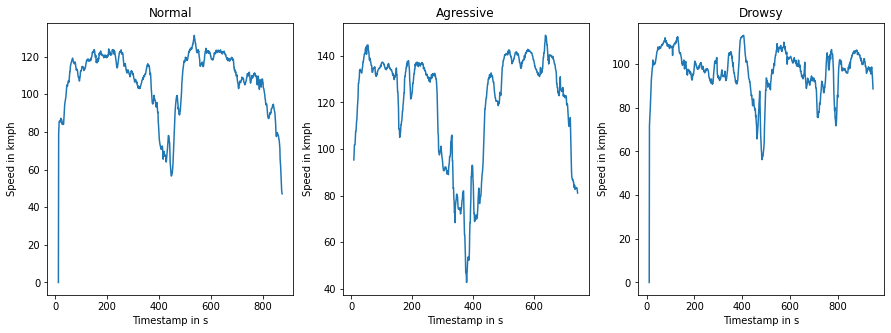

In [ ]:
#Plots for variation of speed with time

f, axs = plt.subplots(1,3,figsize=(15,5))
for ax in axs:
  ax.set(xlabel='Timestamp in s', ylabel='Speed in kmph')


axs[0].plot(data_gps_NM['timestamp'],data_gps_NM['speed'])
axs[0].title.set_text('Normal')
axs[1].plot(data_gps_AM['timestamp'],data_gps_AM['speed'])
axs[1].title.set_text('Agressive')
axs[2].plot(data_gps_DM['timestamp'],data_gps_DM['speed'])
axs[2].title.set_text('Drowsy')



The above plots depict that an agressive driving behaviour is characterized by fluctuating velocity, with high amplitude and frequeny, whereas for a drowsy driving behaviour the vehicle speed is fairly constant over time

####Vehicle Routes

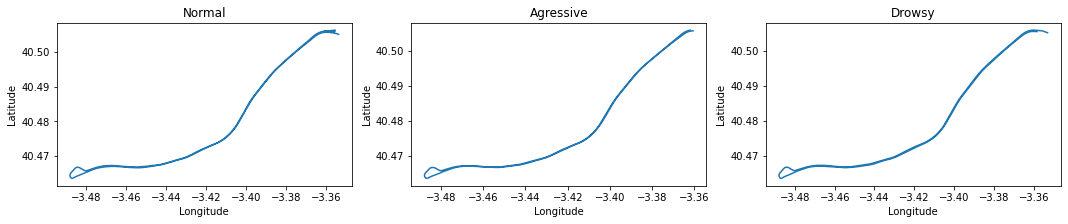

In [ ]:
#Route (2D) taken by different drivers (behaviours)
f, axs = plt.subplots(1,3,figsize=(18,3))
for ax in axs:
  ax.set(xlabel='Longitude', ylabel='Latitude')


axs[0].plot(data_gps_NM['longitude'],data_gps_NM['latitude'])
axs[0].title.set_text('Normal')
axs[1].plot(data_gps_AM['longitude'],data_gps_AM['latitude'])
axs[1].title.set_text('Agressive')
axs[2].plot(data_gps_DM['longitude'],data_gps_DM['latitude'])
axs[2].title.set_text('Drowsy')

The above latitude-longitude plots show that the routes taken by the driver are same irrespective of their behaviour (normal/agressive/drowsy)

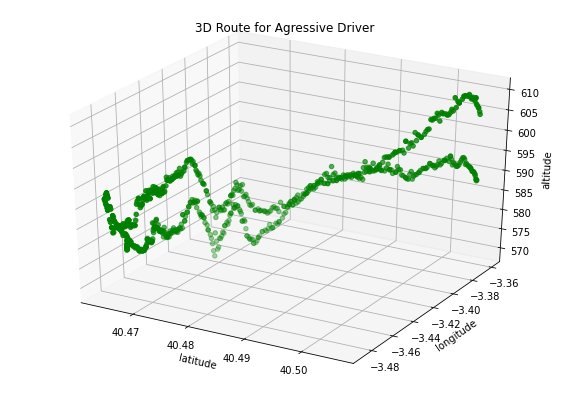

In [ ]:
#Routes taken by drivers
x=data_gps_AM['latitude']
y=data_gps_AM['longitude']
z=data_gps_AM['altitude']

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(x, y, z, color = "green")
plt.title("3D Route for Agressive Driver ")
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_zlabel('altitude')
plt.show()

####Correlation Heatmap (GPS)

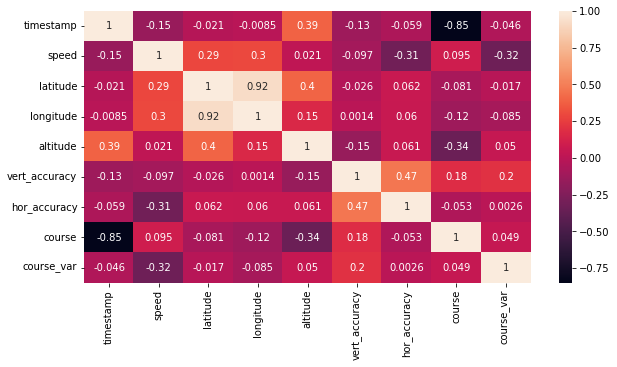

In [ ]:
corrMatrix = data_gps_DM.corr()

plt.figure(figsize = (10,5))
ax=sns.heatmap(corrMatrix, annot=True)
plt.show()


 Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 Here we are using 3 datasets corresponding to 3 categories
1. NM : - Normal Motorway
2. AM : - Agressive Motorway
3. DM : - Drowsy Motorway

#### Plots to visualize how the values of acceleration are distributed across various axes

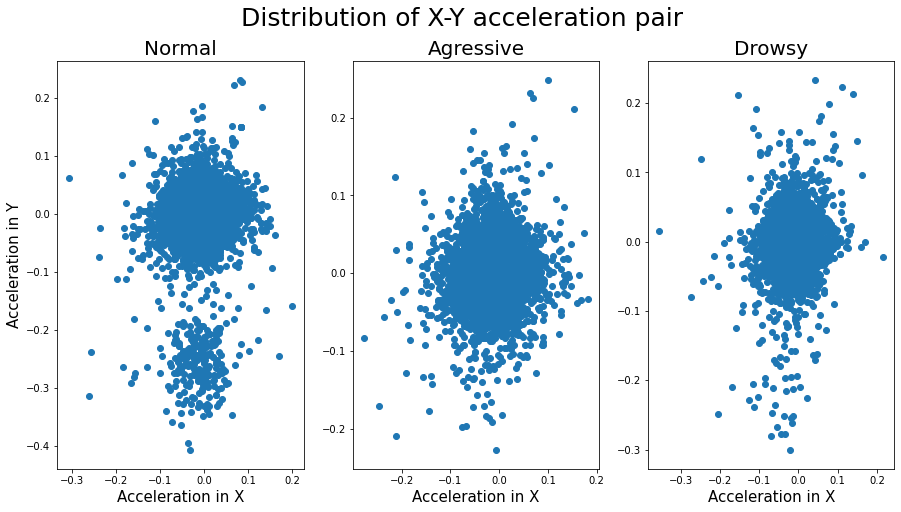

In [ ]:
f, axs = plt.subplots(1,3,figsize=(15,7.5))

axs[0].scatter(data_acc_NM['accn_x'], data_acc_NM['accn_y'], )
axs[0].set_title("Normal", size='20')
#plt.xlabel('acceleration in x')
#plt.ylabel('acceleration in y')



axs[1].scatter(data_acc_AM['accn_x'], data_acc_AM['accn_y'], )
axs[1].set_title("Agressive", size='20')
#plt.xlabel('acceleration in x')
#plt.xlabel('acceleration in x')



axs[2].scatter(data_acc_DM['accn_x'], data_acc_DM['accn_y'], )
axs[2].set_title("Drowsy", size='20')
#plt.xlabel('acceleration in x')

f.suptitle('Distribution of X-Y acceleration pair', fontsize=25)

axs[0].set_ylabel('Acceleration in Y', size = 15)
axs[0].set_xlabel('Acceleration in X', size = 15)
axs[1].set_xlabel('Acceleration in X', size = 15)
axs[2].set_xlabel('Acceleration in X', size = 15);


Clearly the accelerations are clustered arounf the origin for agressive and Drowsy behaviour. However, there are two clusters in case of Normal behaviour.

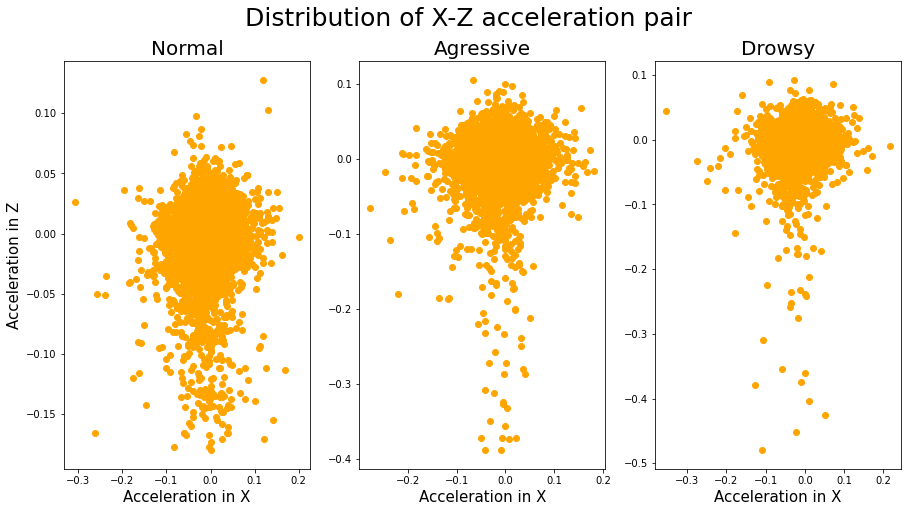

In [ ]:
f, axs = plt.subplots(1,3,figsize=(15,7.5))

axs[0].scatter(data_acc_NM['accn_x'], data_acc_NM['accn_z'], color='orange')
axs[0].set_title("Normal", size='20')
#plt.xlabel('acceleration in x')
#plt.ylabel('acceleration in y')



axs[1].scatter(data_acc_AM['accn_x'], data_acc_AM['accn_z'], color='orange')
axs[1].set_title("Agressive", size='20')
#plt.xlabel('acceleration in x')
#plt.xlabel('acceleration in x')



axs[2].scatter(data_acc_DM['accn_x'], data_acc_DM['accn_z'], color='orange')
axs[2].set_title("Drowsy", size='20')
#plt.xlabel('acceleration in x')

f.suptitle('Distribution of X-Z acceleration pair', fontsize=25)

axs[0].set_ylabel('Acceleration in Z', size = 15)
axs[0].set_xlabel('Acceleration in X', size = 15)
axs[1].set_xlabel('Acceleration in X', size = 15)
axs[2].set_xlabel('Acceleration in X', size = 15);


It can be seen that the data points are clustered around a positive z-acceleration for 0 x-acceleration in the case of agressive and drowsy behaviours, while the clustering is around the origin for normal behaviour.

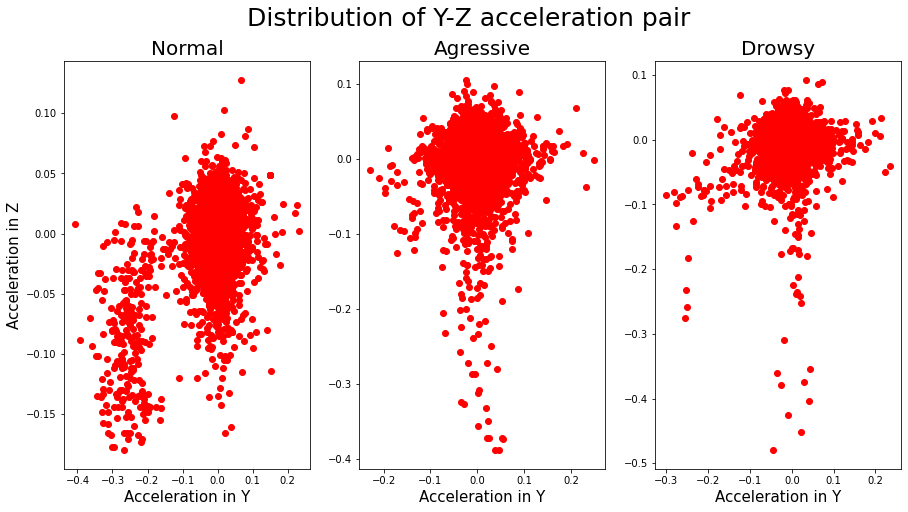

In [ ]:
f, axs = plt.subplots(1,3,figsize=(15,7.5))

axs[0].scatter(data_acc_NM['accn_y'], data_acc_NM['accn_z'], color='red')
axs[0].set_title("Normal", size='20')
#plt.xlabel('acceleration in x')
#plt.ylabel('acceleration in y')



axs[1].scatter(data_acc_AM['accn_y'], data_acc_AM['accn_z'], color='red')
axs[1].set_title("Agressive", size='20')
#plt.xlabel('acceleration in x')
#plt.xlabel('acceleration in x')



axs[2].scatter(data_acc_DM['accn_y'], data_acc_DM['accn_z'], color='red')
axs[2].set_title("Drowsy", size='20')
#plt.xlabel('acceleration in x')

f.suptitle('Distribution of Y-Z acceleration pair', fontsize=25)

axs[0].set_ylabel('Acceleration in Z', size = 15)
axs[0].set_xlabel('Acceleration in Y', size = 15)
axs[1].set_xlabel('Acceleration in Y', size = 15)
axs[2].set_xlabel('Acceleration in Y', size = 15);


The distribution for y-z pair is fairly similar to the x-z pair except that normal behaviour seems to have two clusters similar to the x-y  pair.

#### Correlation Heatmap for Normal

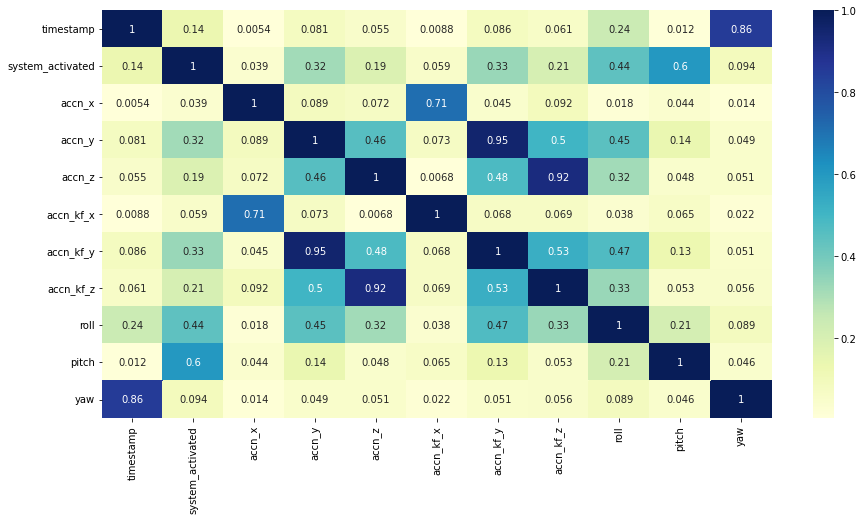

In [ ]:
f, axs = plt.subplots(1,1,figsize=(15,7.5))
sns.heatmap(data_acc_NM.corr(), cmap="YlGnBu", annot=True,ax=axs)

#### Correlation Heatmap for Agressive

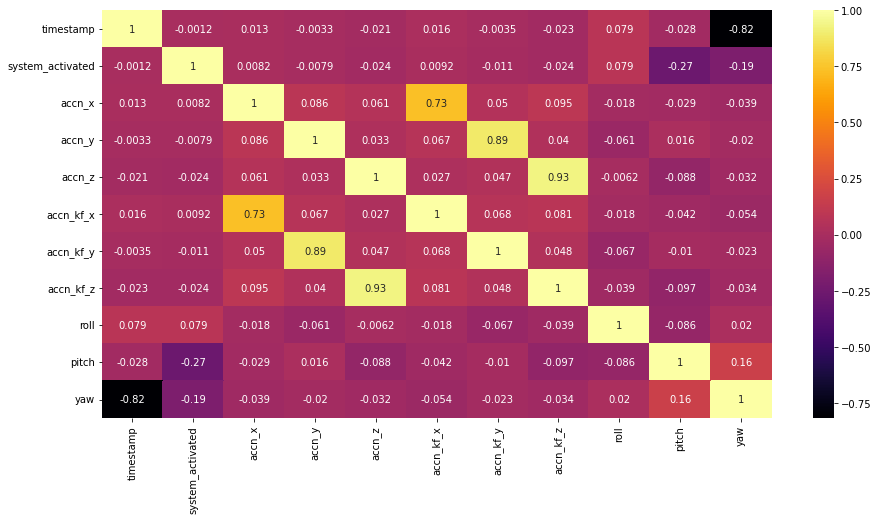

In [ ]:
f, axs = plt.subplots(1,1,figsize=(15,7.5))
sns.heatmap(data_acc_AM.corr(), cmap="inferno", annot=True,ax=axs)

#### Correlation Heatmap for Drowsy

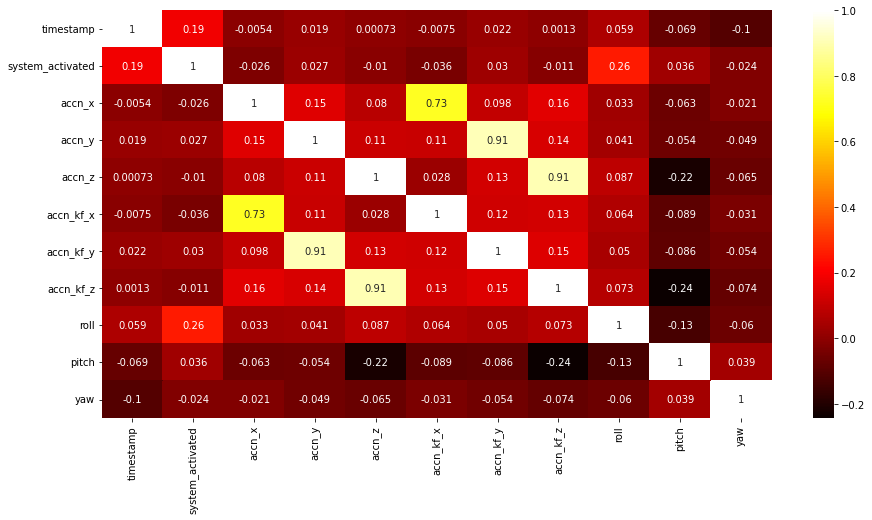

In [ ]:
f, axs = plt.subplots(1,1,figsize=(15,7.5))
sns.heatmap(data_acc_DM.corr(), cmap="hot", annot=True,ax=axs)

From the above heatmaps, we can conclude that 


*   Yaw and timestamp are highly correlated variables for agressive and normal behavior
*   Acceleration in the x, y, z directions are highly correlated to their corresponding values obtained through Kalman Filter




#### Variation of acceleration with time
We will observe the variation of accelration in **z direction** (the one that alligns with the motion of the car) with time.

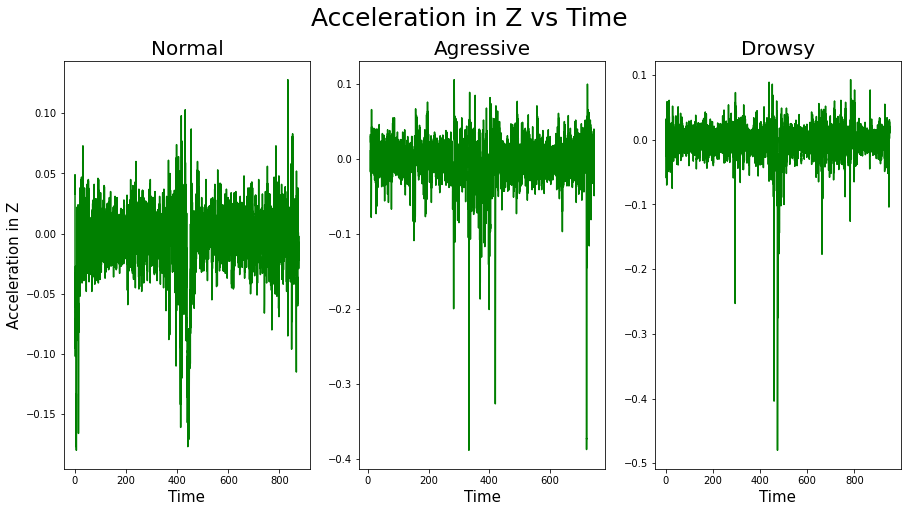

In [ ]:
f, axs = plt.subplots(1,3,figsize=(15,7.5))

axs[0].plot(data_acc_NM['timestamp'], data_acc_NM['accn_z'], color='g')
axs[0].set_title("Normal", size='20')
#plt.xlabel('acceleration in x')
#plt.ylabel('acceleration in y')



axs[1].plot(data_acc_AM['timestamp'], data_acc_AM['accn_z'], color='g')
axs[1].set_title("Agressive", size='20')
#plt.xlabel('acceleration in x')
#plt.xlabel('acceleration in x')



axs[2].plot(data_acc_DM['timestamp'], data_acc_DM['accn_z'], color='g')
axs[2].set_title("Drowsy", size='20')
#plt.xlabel('acceleration in x')

f.suptitle('Acceleration in Z vs Time', fontsize=25)

axs[0].set_ylabel('Acceleration in Z', size = 15)
axs[0].set_xlabel('Time', size = 15)
axs[1].set_xlabel('Time', size = 15)
axs[2].set_xlabel('Time', size = 15);


1. We can see a very random variation of acceleration with time. This is also evident from the low value of correlation.
2. We can see huge fluctiations in cases of agressive as well as drowsy behaviour. This is not far from expectations.

In [ ]:
data_acc_NM.columns

Index(['timestamp', 'system_activated', 'accn_x', 'accn_y', 'accn_z',
       'accn_kf_x', 'accn_kf_y', 'accn_kf_z', 'roll', 'pitch', 'yaw'],
      dtype='object')

#### Hexagonal (density) plots for acceleration with and without kalman filter
We see strong correlation between the values obtained with and without kalman filter. We draw the flowing plots to understand the pattern better. 

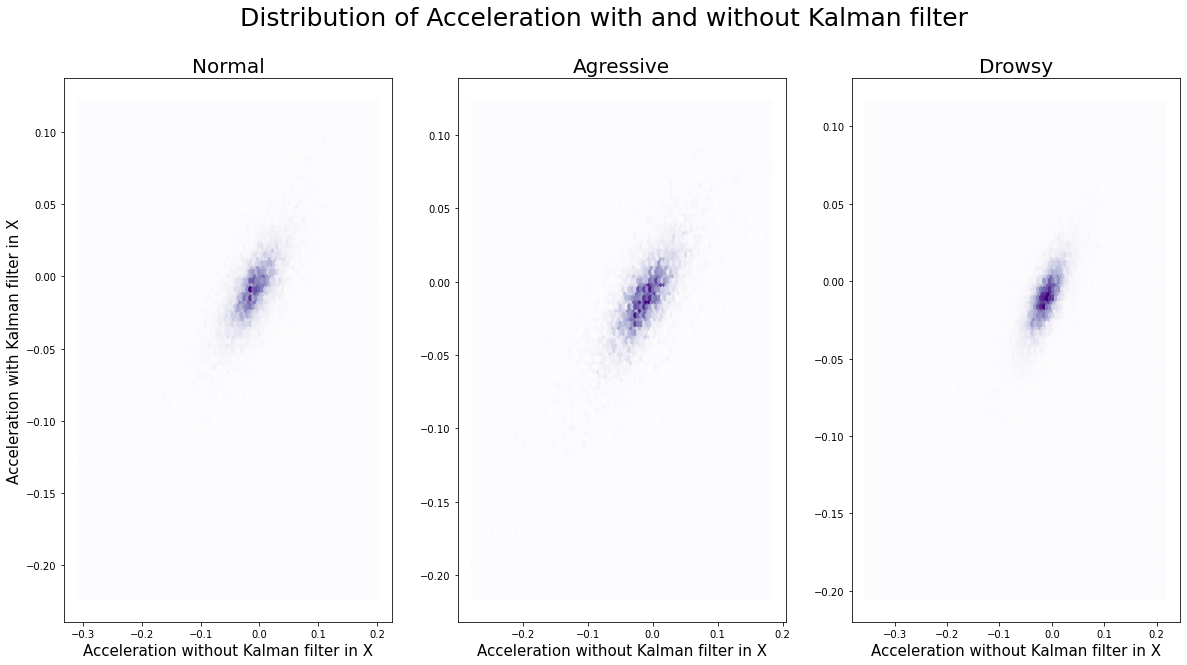

In [ ]:
f, axs = plt.subplots(1,3,figsize=(20,10))

axs[0].hexbin(data_acc_NM['accn_x'], data_acc_NM['accn_kf_x'], cmap='Purples')
axs[0].set_title("Normal", size='20')
#plt.xlabel('acceleration in x')
#plt.ylabel('acceleration in y')



axs[1].hexbin(data_acc_AM['accn_x'], data_acc_AM['accn_kf_x'],  cmap='Purples')
axs[1].set_title("Agressive", size='20')
#plt.xlabel('acceleration in x')
#plt.xlabel('acceleration in x')



axs[2].hexbin(data_acc_DM['accn_x'], data_acc_DM['accn_kf_x'],  cmap='Purples')
axs[2].set_title("Drowsy", size='20')
#plt.xlabel('acceleration in x')

f.suptitle('Distribution of Acceleration with and without Kalman filter in X', fontsize=25)

axs[0].set_ylabel('Acceleration with Kalman filter in X', size = 15)
axs[0].set_xlabel('Acceleration without Kalman filter in X', size = 15)
axs[1].set_xlabel('Acceleration without Kalman filter in X', size = 15)
axs[2].set_xlabel('Acceleration without Kalman filter in X', size = 15);


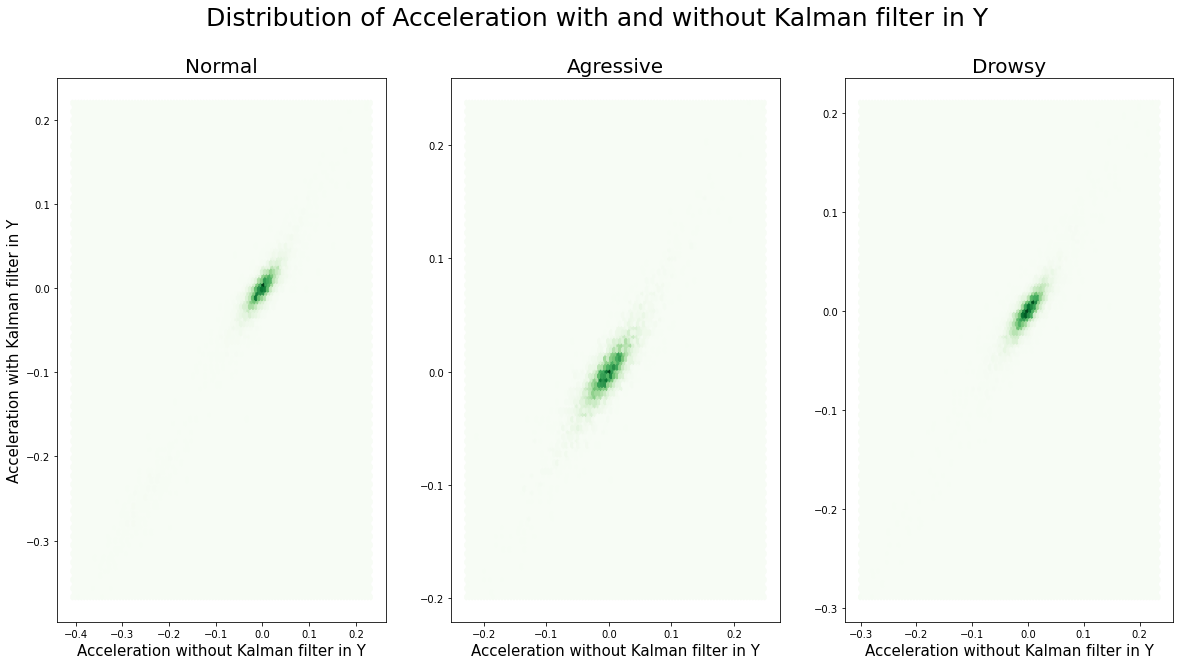

In [ ]:
f, axs = plt.subplots(1,3,figsize=(20,10))

axs[0].hexbin(data_acc_NM['accn_y'], data_acc_NM['accn_kf_y'], cmap='Greens')
axs[0].set_title("Normal", size='20')
#plt.xlabel('acceleration in x')
#plt.ylabel('acceleration in y')



axs[1].hexbin(data_acc_AM['accn_y'], data_acc_AM['accn_kf_y'],  cmap='Greens')
axs[1].set_title("Agressive", size='20')
#plt.xlabel('acceleration in x')
#plt.xlabel('acceleration in x')



axs[2].hexbin(data_acc_DM['accn_y'], data_acc_DM['accn_kf_y'],  cmap='Greens')
axs[2].set_title("Drowsy", size='20')
#plt.xlabel('acceleration in x')

f.suptitle('Distribution of Acceleration with and without Kalman filter in Y', fontsize=25)

axs[0].set_ylabel('Acceleration with Kalman filter in Y', size = 15)
axs[0].set_xlabel('Acceleration without Kalman filter in Y', size = 15)
axs[1].set_xlabel('Acceleration without Kalman filter in Y', size = 15)
axs[2].set_xlabel('Acceleration without Kalman filter in Y', size = 15);


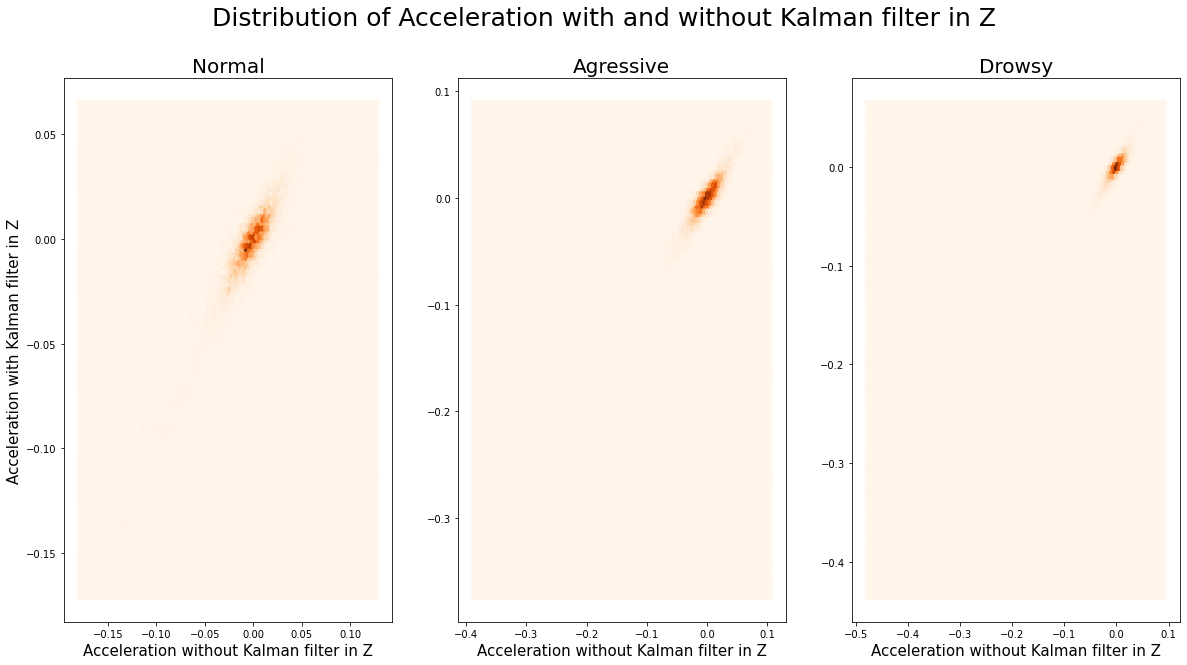

In [ ]:
f, axs = plt.subplots(1,3,figsize=(20,10))

axs[0].hexbin(data_acc_NM['accn_z'], data_acc_NM['accn_kf_z'], cmap='Oranges')
axs[0].set_title("Normal", size='20')
#plt.xlabel('acceleration in x')
#plt.ylabel('acceleration in y')



axs[1].hexbin(data_acc_AM['accn_z'], data_acc_AM['accn_kf_z'],  cmap='Oranges')
axs[1].set_title("Agressive", size='20')
#plt.xlabel('acceleration in x')
#plt.xlabel('acceleration in x')



axs[2].hexbin(data_acc_DM['accn_z'], data_acc_DM['accn_kf_z'],  cmap='Oranges')
axs[2].set_title("Drowsy", size='20')
#plt.xlabel('acceleration in x')

f.suptitle('Distribution of Acceleration with and without Kalman filter in Z', fontsize=25)

axs[0].set_ylabel('Acceleration with Kalman filter in Z', size = 15)
axs[0].set_xlabel('Acceleration without Kalman filter in Z', size = 15)
axs[1].set_xlabel('Acceleration without Kalman filter in Z', size = 15)
axs[2].set_xlabel('Acceleration without Kalman filter in Z', size = 15);



Observations:
1. There seems to be a very strong linear trend between the 2 quantities in all the cases.
2. It will definitely be useful to use only one of these quantities.


#### Roll vs System activation
As we can see considerable correlation between Roll and System activation, we can check their distribution.

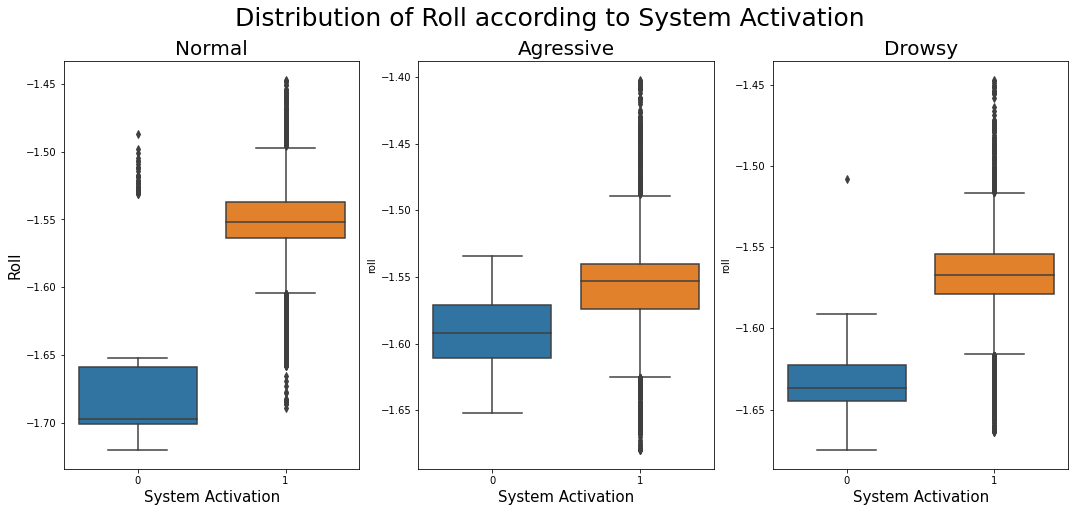

In [ ]:
f, axs = plt.subplots(1,3,figsize=(18,7.5))

sns.boxplot(x=data_acc_NM['system_activated'], y=data_acc_NM['roll'], ax=axs[0])
axs[0].set_title("Normal", size='20')
#plt.xlabel('acceleration in x')
#plt.ylabel('acceleration in y')



sns.boxplot(x=data_acc_AM['system_activated'], y=data_acc_AM['roll'], ax=axs[1])
axs[1].set_title("Agressive", size='20')
#plt.xlabel('acceleration in x')
#plt.xlabel('acceleration in x')



sns.boxplot(x=data_acc_DM['system_activated'], y=data_acc_DM['roll'], ax=axs[2])
axs[2].set_title("Drowsy", size='20')
#plt.xlabel('acceleration in x')

f.suptitle('Distribution of Roll according to System Activation', fontsize=25)

axs[0].set_ylabel('Roll', size = 15)
axs[0].set_xlabel('System Activation', size = 15)
axs[1].set_xlabel('System Activation', size = 15)
axs[2].set_xlabel('System Activation', size = 15);


We can note that there is indeed some correlation between system activation and the roll. The value of roll is on the higher side in most cases when the system is activated. 